
#### CSCI P 556: Applied Machine Learning 

#### Spring 2021

# Homework 2: Probability, Naive Bayes, and Linear Regression

**Submitted by: Vishwas Desai (visdesai) and Sri Satya Sai Pavan Nidadavolu (srnida)**

In [330]:
#for Kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/message/message.csv


In [331]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,  precision_score
import seaborn as sn
import re

# Question 1: Naive Bayes Spam Detector

In [332]:
message = pd.read_csv('../input/message/message.csv')
print(message.shape)
message.head()

(5572, 2)


,Label,Message
0,0,go until jurong point crazy available only ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i don t think he goes to usf he lives aro...


In [333]:
message['Message'].describe().to_frame()

,Message
count,5572
unique,5165
top,sorry i ll call later
freq,30


In [334]:
message['Label'].describe().to_frame()

,Label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [335]:
message['length']= message['Message'].apply(len)
message.head()

,Label,Message,length
0,0,go until jurong point crazy available only ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i don t think he goes to usf he lives aro...,61


In [336]:
message['Label'].value_counts(normalize=True).to_frame()

,Label
0,0.865937
1,0.134063


### Data Visualization

<AxesSubplot:ylabel='Frequency'>

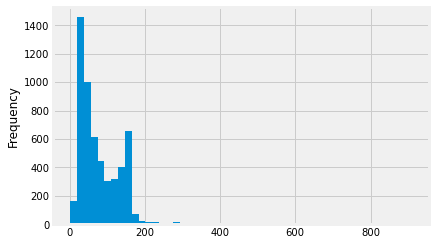

In [337]:
%matplotlib inline
message['length'].plot(bins=50,kind='hist')

In [338]:
message.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    0.865937
1    0.134063
Name: Label, dtype: float64

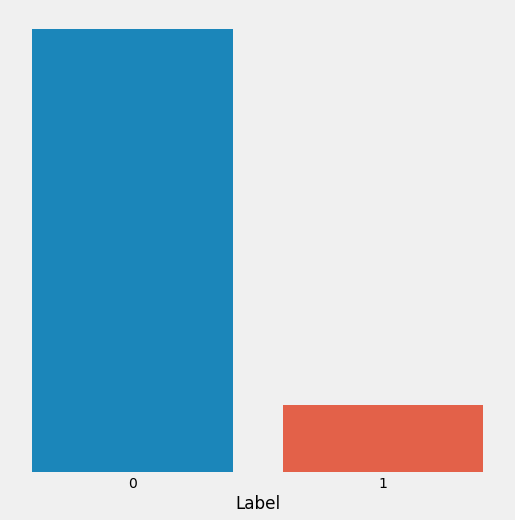

In [339]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
sns.countplot(message.Label)
plt.ylabel('')
plt.yticks([])
message.Label.value_counts(normalize=True)

### Above, we can see that about 87% of the messages are labelled '0' (non-spam), and the remaining 13% are labelled '1' (spam)

## Performing 80-20 split between training and test data and implementing startified K-fold crosss validation 

In [340]:
from sklearn.model_selection import StratifiedShuffleSplit

sks = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2)
for train_index, test_index in sks.split(message, message['Label']):
    training_set = message.loc[train_index]
    test_set = message.loc[test_index]
    

In [341]:
''' # Randomizing the dataset
randomized_data = msg_spam.sample(frac=1, random_state=1)

# Calculate index for split (80-20 split)
training_test_index = round(len(randomized_data) * 0.8)

# Split into training and test sets
training_set = randomized_data[:training_test_index].reset_index(drop=True)
test_set = randomized_data[training_test_index:].reset_index(drop=True)

print(training_set.shape)
print(test_set.shape)'''

' # Randomizing the dataset\nrandomized_data = msg_spam.sample(frac=1, random_state=1)\n\n# Calculate index for split (80-20 split)\ntraining_test_index = round(len(randomized_data) * 0.8)\n\n# Split into training and test sets\ntraining_set = randomized_data[:training_test_index].reset_index(drop=True)\ntest_set = randomized_data[training_test_index:].reset_index(drop=True)\n\nprint(training_set.shape)\nprint(test_set.shape)'

In [342]:
training_set['Message']

4603    hey j  r u feeling any better  hopeso hunny  i...
508     you should know now  so how s anthony  are you...
3602                         jay told me already  will do
2032    i noe la    u wana pei bf oso rite    k lor  o...
753                           dont gimme that lip caveboy
                              ...                        
322     hey    why dont we just go watch x men and hav...
4200    cmon babe  make me horny   turn  me on  txt me...
154     as per your request  melle melle  oru minnamin...
4939    no it was cancelled yeah baby  well that sound...
758     faith makes things possible hope makes things ...
Name: Message, Length: 4457, dtype: object

In [343]:
training_set['Label'].value_counts(normalize=True)

0    0.865829
1    0.134171
Name: Label, dtype: float64

In [344]:
test_set['Label'].value_counts(normalize=True)

0    0.866368
1    0.133632
Name: Label, dtype: float64

### The percentage of spam and non-spam messages in the training and test sets are pretty close to what we have in the full dataset!

## Creating the Vocabulary

> From the training set, compute the total number of unique words in the set and the count of each unique word in each message. Hence, if there are N unique words and M messages in the training set, then the count of each unique word for all messages should result in a M x N matrix. You may want to use DataFrame and dictionary objects to accomplish this. You may also use split() to ignore whitespace.
> 

In [345]:
training_set['Message'] = training_set['Message'].str.split()
# msg_train = msg_train.str.split()
unique = []
for message in training_set['Message']:
   for word in message:
      unique.append(word)

unique = list(set(unique))

In [346]:
unique

['eh74rr',
 'unhappy',
 'weasels',
 'process',
 'back',
 'hours',
 'removal',
 'cr',
 'jd',
 'fans',
 'experiment',
 'strain',
 'messaged',
 'chef',
 'weekends',
 'option',
 '2p',
 'weapon',
 'countin',
 'cr01327bt',
 'stuffing',
 'sapna',
 '7250i',
 'flute',
 '08002988890',
 'ew',
 'sends',
 'ternal',
 'desperate',
 'papers',
 'wrks',
 'wt',
 'word',
 'sura',
 '2u',
 'iam',
 'yalru',
 'croydon',
 'spoken',
 'u',
 '0578',
 'timin',
 'deliver',
 'itna',
 'kickoff',
 'responding',
 'skilgme',
 'wicket',
 '078',
 'pears',
 'txtauction',
 'jamster',
 'boat',
 'imposed',
 'owed',
 'cash',
 'drug',
 '2hook',
 'her',
 'pro',
 'mahfuuz',
 'sumthin',
 'excited',
 'infront',
 'fed',
 'booking',
 '872',
 'brison',
 'b',
 'neville',
 'sorry',
 'steve',
 'red',
 'mailed',
 'chance',
 'major',
 'newspapers',
 'melt',
 'tease',
 'shoppin',
 'chuckin',
 'noi',
 'boobs',
 'pavanaputra',
 'coach',
 'buen',
 'regretted',
 'saristar',
 'ideal',
 'sd',
 'outbid',
 'idiot',
 'doit',
 'defo',
 'rite',
 'c',


In [347]:
word_count = {unique_word: [0] * len(training_set['Message']) for unique_word in unique}

for index, msg in enumerate(training_set['Message']):
   for word in msg:
      word_count[word][index] += 1

In [348]:
words = pd.DataFrame(word_count)
words.head()

,eh74rr,unhappy,weasels,process,back,hours,removal,cr,jd,fans,...,hr,marking,69866,remains,jaya,party,overtime,7am,mathematics,instantly
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [349]:
training_set.reset_index(drop=True, inplace=True)
words.reset_index(drop=True, inplace=True)
train = pd.concat([training_set, words], axis=1)
train

,Label,Message,length,eh74rr,unhappy,weasels,process,back,hours,removal,...,hr,marking,69866,remains,jaya,party,overtime,7am,mathematics,instantly
0,0,"[hey, j, r, u, feeling, any, better, hopeso, h...",153,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,"[you, should, know, now, so, how, s, anthony, ...",166,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,"[jay, told, me, already, will, do]",28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,"[i, noe, la, u, wana, pei, bf, oso, rite, k, l...",62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,"[dont, gimme, that, lip, caveboy]",27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,0,"[hey, why, dont, we, just, go, watch, x, men, ...",62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4453,1,"[cmon, babe, make, me, horny, turn, me, on, tx...",147,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4454,0,"[as, per, your, request, melle, melle, oru, mi...",160,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4455,0,"[no, it, was, cancelled, yeah, baby, well, tha...",129,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Task 2-4 without Laplace Smoothing

## Task 2

> Perform maximum likelihood estimation to determine the prior and class conditional probabilities of the training set (e.g. compute P(y = 1); P(y = 0); P(x<sub>i</sub>|y = 0), and P(x<sub>i</sub>|y = 1)), where x<sub>i</sub> represents the i-th unique word

In [350]:
# Pre Computing prior probailities
P_spam = train.Label.value_counts(normalize=True)[1]
P_not_spam = train.Label.value_counts(normalize=True)[0]
#P_not_spam, P_spam

In [351]:
# Pre Computing number of unique words in the vocabulary
N_unique = len(unique)

# Getting number os Spam and not spam messages
N_spam = len(train[train['Label'] == 1])

N_notSpam = len(train[train['Label'] == 0] )

N_unique, N_spam, N_notSpam

(7734, 598, 3859)

### Calculating Conditional probailities

In [352]:
# Class Conditional probailities

P_feature_given_spam = {word: 0 for word in unique}
P_feature_given_not_spam = {word: 0 for word in unique}

spam = train[train.Label == 1]
not_spam = train[train.Label == 0]

for word in unique:
    
    N_feature_given_spam = spam[word].sum()
    N_feature_given_not_spam = not_spam[word].sum()
    
    # for Spam Messages
    P_word_given_spam = ((N_feature_given_spam) / (N_spam +  N_unique))
    P_feature_given_spam[word] = P_word_given_spam
    
    # for Not Spam Messages
    P_word_given_not_spam = ((N_feature_given_not_spam) / (N_notSpam + N_unique))
    P_feature_given_not_spam[word] = P_word_given_not_spam



In [353]:
print("Probability of non spam :", P_not_spam)
print("Probability of spam :", P_spam)
print("Probability of word given spam :", P_word_given_spam)
print("Probability of word given nonspam :", P_word_given_not_spam)

Probability of non spam : 0.8658290329818263
Probability of spam : 0.13417096701817366
Probability of word given spam : 0.0
Probability of word given nonspam : 0.00017251789873199344


## Task 3
> Once the above probabilities are determined, use Naive Bayes classification to classify each
> of the testing examples as spam or not. Ignore words from the testing set that are not
> contained in the training set. Report the accuracy, precision, recall and specificity, along
> with the confusion matrix for each fold. Also report the average accuracy, precision, recall
> and specificity over all folds.

In [354]:
def classify(message,v):
    
    spam = 1
    not_spam = 1
    
    for word in message:
        if word in P_feature_given_spam.keys():
            spam *= P_feature_given_spam[word]
        if word in P_feature_given_not_spam.keys():
            not_spam *= P_feature_given_not_spam[word]
        
    P_spam_given_message = P_spam * spam
    P_notSpam_given_message = P_not_spam * not_spam
    
    if v:
        print("P(spam|message) = ",P_spam_given_message)
        print("P(Not Spam|message) = ",P_notSpam_given_message)
    
    if P_spam_given_message > P_notSpam_given_message:
        if v:
            print('Label: 1')
        return 1
    elif P_spam_given_message < P_notSpam_given_message:
        if v:
            print('Label: 0')    
        return 0
    else:
        return  np.nan

In [355]:
# classify('u dun say so early hor u c already then say',v=1)

In [356]:
test_set_cm = test_set.copy(deep=True) 
test_set_cm['predicted'] = test_set_cm['Message'].apply(classify,v = 0)
test_set_cm.head()

,Label,Message,length,predicted
2479,0,not yet just i d like to keep in touch and it...,137,0.0
5344,0,when you guys planning on coming over,38,0.0
11,1,six chances to win cash from 100 to 20 000 po...,136,NaN
2161,0,no its not specialisation can work but its s...,114,0.0
3876,0,okie but i scared u say i fat then u dun wa...,61,0.0


In [357]:
## Accuracy, Precision, Recall and Confusion Matrix

TP=0
TN =0
FP =0 
FN = 0

for row in test_set_cm.iterrows():
    row = row[1]
    
    if row['Label'] == 1 and row['predicted'] == 1:
        TP += 1
    
    elif row['Label'] == 0 and row['predicted'] == 0:
        TN += 1
        
    elif row['Label'] == 1 and row['predicted'] == 0:
        FN += 1
        
    elif row['Label'] == 0 and row['predicted'] == 1:
        FP += 1

total = TP + TN + FP + FN

try:
    accuracy = (TP + TN)/total
    precision = TP/(TP + FP) 
    recall = TP/ (TP + FN)
    specificity = TN / (TN + FP)
    
    print("Accuracy: ", accuracy)
    print("\n")
    print("Precision: ", precision)
    print("\n")
    print("Recall: ", recall)
    print("\n")
    print("Specificity: ", specificity)
    
except ZeroDivisionError:
    print("Values zero!!")


Accuracy:  0.974816369359916


Precision:  0.0


Recall:  0.0


Specificity:  0.9989247311827957


In [358]:
# The built in functions required us to fill the missing values

''' from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predictions = test_set.predicted
testing = test_set.Label

print('Accuracy score: {}'.format(accuracy_score(testing, predictions)))
print('Precision score: {}'.format(precision_score(testing, predictions)))
print('Recall score: {}'.format(recall_score(testing, predictions)))
print('F1 score: {}'.format(f1_score(testing, predictions)))'''

" from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score\n\npredictions = test_set.predicted\ntesting = test_set.Label\n\nprint('Accuracy score: {}'.format(accuracy_score(testing, predictions)))\nprint('Precision score: {}'.format(precision_score(testing, predictions)))\nprint('Recall score: {}'.format(recall_score(testing, predictions)))\nprint('F1 score: {}'.format(f1_score(testing, predictions)))"

*Code Snippet from [Kaggle](http://www.kaggle.com/grfiv4/plot-a-confusion-matrix)*

## Confusion Matrix without Laplace Smoothing

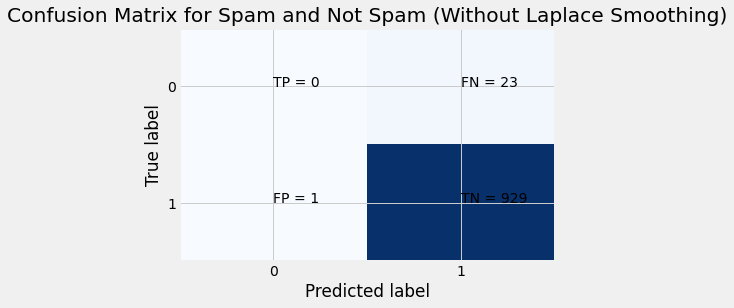

In [359]:
con = [[TP, FN], [FP, TN]]
plt.clf()
plt.imshow(con, interpolation='nearest', cmap='Blues', aspect='auto')
classNames = ['0', '1']
plt.title('Confusion Matrix for Spam and Not Spam (Without Laplace Smoothing)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TP', 'FN'], ['FP', 'TN']]
s = np.asarray(s).reshape(2,2)
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(con[i][j]))
#sn.heatmap(con, annot=labels, cmap='Blues')
plt.show()

## Task 4

> Write a paragraph the summarizes the results and your thoughts about Naive Bayes classification for this problem

* ### Of the entire test set, the model classified about 85% as Not Spam and about 14% as spam. The NB model's predictions are quite similiar to the proportions of the original datset but this doesnt consider labels which were missclassified


* ### Accuracy is a good metric that describes the proportion of correctly classified labels by the model. The accuracy is simply comparision between the Label and the predicted columns divided by the total units in the test sample. The accuracy of our model is about 98% which is good in itself but we assume it might be because of less data used for training. Even the confusion matrix , percision, recall, specifcity lean towards our assumption

* ### Misclassifed words will pose a problem and can be said as a Limitation of this model

# Task 2-4 with Laplace Smoothing

## Task 2 with Laplace Smoothing (α = 1)

In [360]:
# Prior Probability
P_spam = train.Label.value_counts(normalize=True)[1]
P_not_spam = train.Label.value_counts(normalize=True)[0]

# Pre Computing number of unique words in the vocabulary
N_unique = len(unique)

# Number of spam(1) and not spam(0) words in the message
N_spam = len(train[train['Label'] == 1])

N_notSpam = len(train[train['Label'] == 0] )

# Laplace Smoothing
alpha = 1

#P_not_spam, P_spam , N_unique , N_spam, N_notSpam

In [361]:
# Number of spam(1) and not spam(0) words in the message

# Conditional Probaility
P_feature_given_spam_laplace = {word: 0 for word in unique}
P_feature_given_not_spam_laplace = {word: 0 for word in unique}

spam = train[train.Label == 1]
not_spam = train[train.Label == 0]

for word in unique:
    
    N_feature_given_spam = spam[word].sum()
    N_feature_given_not_spam = not_spam[word].sum()
    
    P_word_given_spam_laplace = ((N_feature_given_spam + alpha) / (N_spam +  N_unique))
    P_feature_given_spam_laplace[word] = P_word_given_spam_laplace
    
    P_word_given_not_spam_laplace = ((N_feature_given_not_spam + alpha) / (N_notSpam + N_unique))
    P_feature_given_not_spam_laplace[word] =P_word_given_not_spam_laplace

In [362]:
print("Probability of non spam :", P_not_spam)
print("Probability of spam :", P_spam)
print("Probability of word given spam :", P_word_given_spam_laplace)
print("Probability of word given nonspam :", P_word_given_not_spam_laplace)

Probability of non spam : 0.8658290329818263
Probability of spam : 0.13417096701817366
Probability of word given spam : 0.00012001920307249159
Probability of word given nonspam : 0.00025877684809799017


## Task 3

> Once the above probabilities are determined, use Naive Bayes classification to classify each
> of the testing examples as spam or not. Ignore words from the testing set that are not
> contained in the training set. Report the accuracy, precision, recall and specificity, along
> with the confusion matrix for each fold. Also report the average accuracy, precision, recall
> and specificity over all folds.

In [363]:
def classify_laplace(message,v):

    spam = 1
    not_spam = 1
    
    for word in message:
        if word in P_feature_given_spam_laplace.keys():
            spam *= P_feature_given_spam_laplace[word]
        if word in P_feature_given_not_spam.keys():
            not_spam *= P_feature_given_not_spam[word]
        
    P_spam_given_message_laplace = P_spam * spam
    P_notSpam_given_message_laplace = P_not_spam * not_spam
    
    if v:
        print("P(spam|message) = ",P_spam_given_message_laplace)
        print("P(Not Spam|message) = ",P_notSpam_given_message_laplace)
    
    if P_spam_given_message_laplace > P_notSpam_given_message_laplace:
        if v:
            print('Label: 1')
        return 1
    elif P_spam_given_message_laplace < P_notSpam_given_message_laplace:
        if v:
            print('Label: 0')    
        return 0
    else:
        return np.nan

In [364]:
#classify_laplace('winner as a valued network customer you have been selected to receivea 900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only',v=1)

In [365]:
## Testing model on test set
test_set_laplace = test_set.copy(deep=True) 
test_set_laplace['predicted'] = test_set_laplace['Message'].apply(classify_laplace, v=0)
test_set_laplace.head()

,Label,Message,length,predicted
2479,0,not yet just i d like to keep in touch and it...,137,0.0
5344,0,when you guys planning on coming over,38,0.0
11,1,six chances to win cash from 100 to 20 000 po...,136,1.0
2161,0,no its not specialisation can work but its s...,114,0.0
3876,0,okie but i scared u say i fat then u dun wa...,61,0.0


In [366]:
## Accuracy, Precision, Recall and Confusion Matrix

TP_laplace=0
TN_laplace =0
FP_laplace =0 
FN_laplace = 0

for row in test_set_laplace.iterrows():
    row = row[1]
    
    if row['Label'] == 1 and row['predicted'] == 1:
        TP_laplace += 1
    
    elif row['Label'] == 0 and row['predicted'] == 0:
        TN_laplace += 1
        
    elif row['Label'] == 1 and row['predicted'] == 0:
        FN_laplace += 1
        
    elif row['Label'] == 0 and row['predicted'] == 1:
        FP_laplace += 1

total_laplace = TP_laplace + TN_laplace + FP_laplace + FN_laplace

try:
    accuracy = (TP_laplace + TN_laplace)/total
    precision = TP_laplace/(TP_laplace + FP_laplace) 
    recall = TP_laplace/ (TP_laplace + FN_laplace)
    specificity = TN_laplace / (TN_laplace + FP_laplace)
    
    print("Accuracy: ", accuracy)
    print("\n")
    print("Precision: ", precision)
    print("\n")
    print("Recall: ", recall)
    print("\n")
    print("Specificity: ", specificity)
    
except ZeroDivisionError:
    print("Values zero!!")


Accuracy:  1.0493179433368311


Precision:  0.8255813953488372


Recall:  0.7553191489361702


Specificity:  0.9841101694915254


*Code Snippet from [Kaggle](http://www.kaggle.com/grfiv4/plot-a-confusion-matrix)*

## Confusion Matrix with Laplace Smoothing

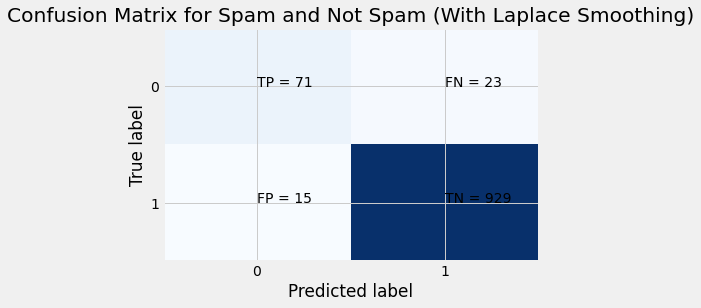

In [367]:
con = [[TP_laplace, FN_laplace], [FP_laplace, TN_laplace]]
plt.clf()
plt.imshow(con, interpolation='nearest', cmap='Blues', aspect='auto')
classNames = ['0', '1']
plt.title('Confusion Matrix for Spam and Not Spam (With Laplace Smoothing)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TP', 'FN'], ['FP', 'TN']]
s = np.asarray(s).reshape(2,2)
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(con[i][j]))
#sn.heatmap(con, annot=labels, cmap='Blues')
plt.show()

## Task 4

> Write a paragraph the summarizes the results and your thoughts about Naive Bayes classification for this problem

* ### The Alpha is the Laplace smoothing constant which is required because there can be words in the input text that only appear in spam messages and not in non-spam messages and hence has to be 'smoothened' out when calculating say P(word|non-spam) which gives a 0. 


* ### Using Naive Bayes Algorithm a sucessful model was built, this model assumes an independece between the words in the messages and iits context. Basewd on this assumption, this modle gave these accuracies:

   #### - Without Laplace Smoothing: 98%
   #### - With Laplace Smoothing: 97%


##### Discuss how the results after Laplace Smoothing differ from the prior results.

### The class conditional probabilities for each feature P(x<sub>i</sub>|y) was 0 for many case, we assumed that this might be beacuse of insufficent data. Laplace smoothing solves this by giving the last word a small non-zero probability for both classes, so that the posterior probabilities don't become 0.

## References

#### https://sebastianraschka.com/Articles/2014_naive_bayes_1.html

#### https://towardsdatascience.com/introduction-to-na%C3%AFve-bayes-classifier-fa59e3e24aaf

#### https://www.kdnuggets.com/2020/01/guide-precision-recall-confusion-matrix.html

#### https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea